In [1]:
import pandas as pd
import os
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
import re

In [2]:
data = pd.read_pickle('../../data/txn.pkl')

## EDA

In [3]:
dict(data["商品名稱"].value_counts())

{'ORIGINS品木宣言靈芝水200ml': 16576,
 '天添+益生菌(2g*30包)': 8660,
 '韓國TakeAppeal維他命除氯香氛濾芯(六款不挑)': 8552,
 'Thera Lady 奈米金箔精華液 (大金瓶)100ml': 7501,
 '薑黃維生素C+B群(120顆)': 7255,
 '韓國BOTO紅石榴汁80ml(10包入)': 6497,
 'Simply新普利夜間代謝酵素錠(30錠)': 6368,
 '韓國Coreana高麗雅娜超保濕精華護手霜50ml': 6134,
 '澳洲Eaoron蜂膠膠囊面膜10mlx8入': 5802,
 '大瑪低卡純素酸辣粉133g': 5801,
 '澳洲EAORON塗抹式水光精華(第五代)': 5539,
 '泰國香茅驅蚊盒50g': 5514,
 '韓國TS花漾浪漫香水洗髮精500ml': 5244,
 '日本Propolinse蜂膠漱口水600ml-橘瓶': 5115,
 '第 040 標(5/12)限購100包：台灣製MD版雙鋼印馬卡龍口罩(大人款)(選色)-粉&紫&黃&綠&橘&黑&橙-擇1-10片入一包': 5085,
 '澳洲EAORON固態冰川水120ml': 4989,
 'HERMES愛瑪仕 橘綠之泉香皂50g(盒裝)': 4761,
 '澳洲Eaoron麥盧卡蜂膠面霜50g': 4491,
 '316不鏽鋼煎鏟*1支': 4431,
 'SERENE HOUSE力士香氛車夾(送補充包一盒)': 4130,
 'Nabati siip金磚玉米棒(5g*20條)(碳烤玉米/起司) 不挑': 4007,
 '十全果醋飲料(1箱/30入) 蘋果/青梅/葡萄': 3857,
 '台灣製防疫護目鏡': 3751,
 '澳洲FicceCode生薑洗髮精300ml(送80ml軟管)': 3723,
 '韓國WELLDERMA深層保濕潔面乳120ml': 3603,
 '日本United Athle(UA)基本色短T(黑/深藍/麻灰/卡其/鐵灰/白)不挑': 3521,
 '韓國BOTO紅石榴膠原蛋白飲70ml(10包一組)': 3503,
 '大研生醫德國頂級魚油兩入-加送隨身包一盒(20粒)': 3355,
 'Joajota小白管氧氣洗面乳120ml': 3193,
 '日本Unit

In [4]:
data.columns

Index(['訂單編號', '下單日期', '時間戳記', 'psid', 'asid', 'user_id', 'channel_name',
       '商品id', '商品名稱', '樣式', '規格', '單價', '數量', '折扣', '總金額', '付款單號', '專屬折扣',
       '運費', '收款金額', '付款方式', '運送方式', '寄送地址', '場次', 'date'],
      dtype='object')

In [5]:
data["asid"].astype(str).value_counts()

1345342299140765                     3177
10221775361446840                    3137
2504464673174298                     2932
1000423206992036                     2552
3053938868065389                     2447
                                     ... 
5014516495229606                        1
U10c5fb65fefe46fc8a88bd07d9155012       1
3970779176283359                        1
4600981186580712                        1
1939325412915423                        1
Name: asid, Length: 199067, dtype: int64

In [6]:
user_count = data.groupby(['asid']).count()
user_count.describe()

,訂單編號,下單日期,時間戳記,psid,user_id,channel_name,商品id,商品名稱,樣式,規格,...,總金額,付款單號,專屬折扣,運費,收款金額,付款方式,運送方式,寄送地址,場次,date
count,199067.000000,199067.000000,199067.000000,199067.000000,199067.000000,199067.000000,199067.000000,199067.000000,199067.000000,199067.000000,...,199067.000000,199067.000000,199067.000000,199067.000000,199067.000000,199067.000000,199067.000000,199067.000000,199067.000000,199067.000000
mean,28.615652,28.615652,28.615652,20.836995,28.615652,28.615652,28.574525,28.615652,14.264614,14.968955,...,28.615652,28.615652,28.615652,28.615652,28.615652,28.615652,28.615652,28.611337,27.340815,28.615652
std,77.382498,77.382498,77.382498,53.269470,77.382498,77.382498,77.361683,77.382498,42.064110,39.061487,...,77.382498,77.382498,77.382498,77.382498,77.382498,77.382498,77.382498,77.379291,74.466091,77.382498
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,6.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,1.000000,3.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
75%,21.000000,21.000000,21.000000,16.000000,21.000000,21.000000,21.000000,21.000000,8.000000,12.000000,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,20.000000,21.000000
max,3177.000000,3177.000000,3177.000000,2045.000000,3177.000000,3177.000000,3177.000000,3177.000000,1657.000000,1662.000000,...,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3036.000000,3177.000000


In [10]:
uid = user_count['下單日期'].loc[user_count['下單日期'] > 50].index
data_ = data.loc[data['asid'].isin(uid)]

Text(0, 0.5, 'User Count')

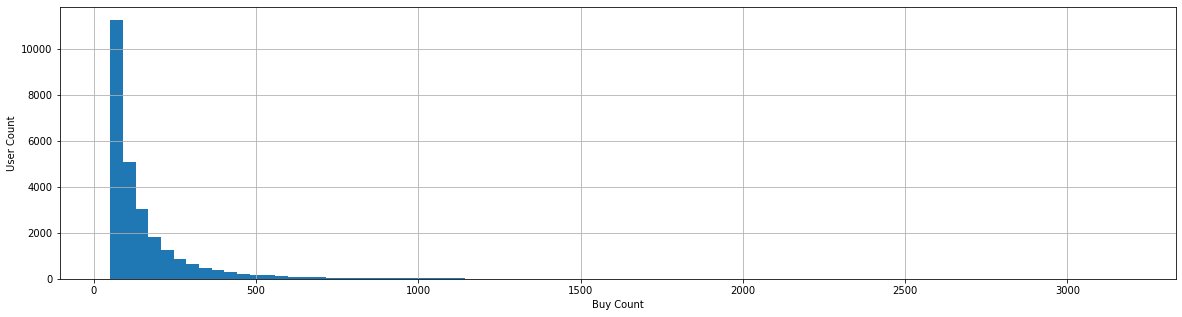

In [15]:
# data["聯絡電話"].value_counts().hist()
data_["asid"].value_counts().hist(bins=80, figsize=(20,5))
plt.xlabel('Buy Count')
plt.ylabel('User Count')
# 一個bin大約代表10個，買1~10個商品的user有6000多個

In [9]:
data["付款方式"].value_counts()

匯款     184840
信用卡    103583
Name: 付款方式, dtype: int64

In [10]:
print(list(data.columns))

['下單日期', '商品名稱', '規格', '單價', '數量', '折扣', '總金額', '專屬折扣', '運費', '信用卡手續費', '紅利折抵', '收款金額', '付款方式', '運送方式', '收件人', '寄送地址', '聯絡電話', '場次']


In [11]:
dict(data[data["聯絡電話"] == "0919800331"]["商品名稱"])

{4293: 'NIKE WMNS DAYBREAK奶油糖霜休閒鞋(351-101)',
 4294: 'TEVA白色織帶涼鞋(4006)',
 4295: '浪凡冒險公主女性淡香精30ml',
 4296: 'Tiffany & co. Intense同名晶鑽女性淡香精5ml',
 4297: '抗藍光眼鏡(2053)灰/透明/黑',
 4298: '韓國MOREMO柔順護髮精華油150ml',
 4299: '洋基前胸大LOGO短T(61-800白/900黑)',
 4300: '北臉手提袋(L16B)米',
 4301: '韓國TakeAppea高質感香水20ml(10款不挑)',
 4302: 'laura mercier 蘿拉蜜思煥顏透明蜜粉29g',
 4303: 'HERMES愛瑪仕 橘綠之泉香皂50g(盒裝)',
 4304: 'SABON身體磨砂膏600g(麝香/香芒奇異果/玫瑰)',
 4305: 'Dior花漾女性淡香水100ml',
 4306: '真鑽項鍊(7016愛心/7023十字架/7033無限大)',
 4307: '真鑽項鍊(7016愛心/7023十字架/7033無限大)',
 4308: 'Ferragamo 湛藍之水男香30ml',
 4309: '植村秀潔顏油 50ml 不挑',
 4310: '韓國AMINI舒緩泡泡身體去角質200ml',
 4311: '韓國 logicallyskin肌膚修復面霜30ml',
 4312: 'Narciso Rodriguez For her 深情繆思女性淡香精50ml',
 4313: 'TRUSSARDI DONNA女性淡香精沾香瓶50ml',
 4314: '澳洲星期四農莊茶樹足底粉',
 4315: 'Thera Lady防蟎黃金皂80g',
 4316: '韓國 centellian24積雪草保濕修復霜(3倍配方版)',
 4317: 'Burberry 風格女性淡香精滾珠瓶7.5ml',
 4318: '【加購0401】韓國MERZY挑戰極限眼線液筆(P1黑/P3棕)',
 4319: '【商城】FFLOW洋甘菊精油10ml',
 4320: '【加購0404】NIKE斜背包 (904-011)黑',
 7535: 'PUMA小旅行袋(3301)',
 7536: 'Herm

In [18]:
unique_items = data["商品名稱"].unique()
unique_items = set(unique_items)
print("unique item數量:", len(set(unique_items)))

unique item數量: 151011


In [13]:
unique_items

{'Adidas愛迪達黑框山景經緯度藍短T(116)',
 'Picnic風味杯麵60g(綠咖哩/泰式酸辣)',
 '(0722活動)NIKE彩色線條LOGO後背包(3587-010)黑',
 '【商城】防潑水彈力口袋縮口長褲(灰/軍綠/卡)EG011',
 'TOMMY灰鏡面銀鋼錶(1163)',
 '【商城】Adidas愛迪達三葉草大眼睛白色短T(685)',
 '雅詩蘭黛細緻煥采雙效淨化潔面乳150ml',
 'NIKE男款連帽外套(083-010)黑',
 '【商城】ADIDAS 排字縮口長褲(2157)',
 '【加購1115】韓國AROMATICA私密溫和清潔慕絲170ml',
 '【商城】AROMATICA 蘆薈膠300ml',
 'Tommy背心外套(478MUF)',
 '充氣型不倒翁(五款不挑)',
 '【商城】Mario Badescu痘痘組合',
 'ADIDAS楊冪同款三葉草風衣(粉)591',
 '【週二商城限定】CANDY POPPY菓糖爆米花50g (單包)',
 "Penhaligon's潘海利根Floral collection花漾套盒(10ml*3)",
 'YVES YSL短T(19N1-1080)白 贈MF口罩10入',
 '【商城】酸Q軟糖80g(黑加侖/草莓)',
 '(0506活動)ORIGINS品木宣言靈芝水200ml',
 '日本United Athle(UA)基本色短T(黑/藍/白/灰/咖)',
 '潤喉話梅110g',
 '(活動1224)臥佛聖誕手工皂(隨機)',
 '【加購1022】TOMMY女款胸口排字絨外套(2762)藍',
 '(活動0819)試管小香 不挑',
 '韓國TakeAppeal 質感香氛柔軟精',
 '探尋旅者小香4.5ml',
 '【商城】JORDAN大行李袋034GS(黑)',
 '【商城】ADIDAS 東京富士山棒球外套030',
 '【加購1213】PUMA立體浮刻帽T(黑5001/灰5003/綠5070)不挑',
 '牛奶造型餅乾160g',
 '韓國 AMINI舒緩保濕足霜75ml',
 '愛迪達古銅金三葉草(777)',
 '【加購0715】北臉左胸小logo短T(3O7D6)綠',
 'MAXJULI太陽眼鏡(1999T)黑',
 '澳洲YPL美背矯姿帶',
 'JM s

In [20]:
data[data['商品名稱'] == '（免運）第 003 標 (5/12)']

,訂單編號,下單日期,時間戳記,psid,asid,user_id,channel_name,商品id,商品名稱,樣式,...,總金額,付款單號,專屬折扣,運費,收款金額,付款方式,運送方式,寄送地址,場次,date
4485038,BD210512-39112730,2021-05-12,14:38:53,2765824170146026,3788655254490913,4460,工讀生寵物,3286983,（免運）第 003 標 (5/12),NaN,...,2300,PA210512-07386196,0,0,3000,智慧轉帳,一般宅配,台南市北區正覺街56號,20210512,2021-05-12


In [32]:
import re
regex = re.compile(r'(第 [0-9][0-9][0-9] 標 \(.*\))|(^（.*）第 [0-9][0-9][0-9] 標 \(.*\))|(^\(.*\))|(【.*】)')

In [33]:
for item in unique_items:
    if regex.match(item):
        print(item)

(蘋)公主 1126 A09-(限+1)(後台看幾顆)新版 cab's凍齡面膜皂 (110g)*?
（免運）第 003 標 (6/18)
(闆)公主1031 A33-(3袋)鮮味牛肉粉 (10包/袋)*3
第 005 標 (1/26)韓國S'MORE OHGODMALLOW 棉花糖脆餅(4入/盒)
【商城】N31旅行收納分類袋(隨機)
（免運、單獨出貨）第 001 標 (4/1)
（免運）第 009 標 (10/21)
（免運）第 003 標 (2/13)
【商城】澳洲UGG純羊毛圍巾(粉紅12)
【商城】LEVIS短T(迷彩/小LOGO)
【商城】NINE WEST信封磁釦掀蓋方包(粉9294/黑9515/灰9539)
(瑕)270白黑勾CI3899101
(闆)公主 0212 A02-100%石墨烯遠紅外線棉被(180X210)*1-價格後台看
(闆)888 1026 A16-(4顆)(限+1)新版 cab's凍齡面膜皂 (110g)*4---舊版完售全面升級為新版可以接受再下單
第 035 標 (4/21)BOSS 經典LOGO短TEE
第 008 標 (7/28)法拉利 菁萃男性淡香水10ML
(闆)888 1004 A02-嬰兒純水柔濕巾(80抽)*1
(闆)叫賣 0816 A07-(3罐)台灣一條根 痛快噴 (120ml)*3
(程)大師兄 0429 A17-(5罐)PRINCESS PARTY 蔓越莓C錠(60粒/盒)*5--價格後台看
第 020 標 (4/4)MOSCHINO TOY2 熊芯未泯2  女性淡香精5ml
（免運）第 003 標 (5/12)
(闆)888 0130 A01-(限+1)熊寶貝柔軟護衣精3L(4入/箱)-沁藍*1
(闆)公主 1225 A18-(5瓶)多用途添加劑120ML*5
(闆)公主 0927 A02-(3盒)PRINCESS PARTY 葉黃素膠囊PRLS綠蜂膠(全素)(30粒/盒)*3
（免運）第 013 標 (1/23)(全館不限金額免運)
(蔥媽媽)橘子果乾
（免運）第 001 標 (5/20)
第 056 標 (4/20)法國玫翠思亞麻油黑肥皂1000ML(隨機)
(闆)888 1216 A11-(限+1)(3箱)Mixzuzu 膠原蛋白飲190ml(24瓶/箱)*3
【週二商城限定】Adidas三葉草女款

In [15]:
regex.match('Nike鞋盒手提包(紅)49-810')

In [19]:
new_unique_items = []
for item in unique_items:
    item = re.sub(regex, '', item)
    new_unique_items.append(item)

In [21]:
len(new_unique_items)

10201

In [22]:
len(set(new_unique_items))

6902

## 拿掉前與後 unique item 數量的差距

In [24]:
print('拿掉【.*】前：', len(new_unique_items))
print('拿掉【.*】後：', len(set(new_unique_items)))
print('差距：', len(new_unique_items) - len(set(new_unique_items)))

拿掉【.*】前： 10201
拿掉【.*】後： 6902
差距： 3299


In [43]:
regex = re.compile(r'(^\(.*\))')

In [44]:
for item in unique_items:
    if regex.match(item):
        print(item)

(活動5/9) Coach/MK隨機配件(不挑)【限店取拍照】


In [37]:
new_unique_items = []
for item in unique_items:
    item = re.sub(regex, '', item)
    new_unique_items.append(item)

In [38]:
print('拿掉(.*)前：', len(new_unique_items))
print('拿掉(.*)後：', len(set(new_unique_items)))
print('差距：', len(new_unique_items) - len(set(new_unique_items)))

拿掉(.*)前： 10201
拿掉(.*)後： 9940
差距： 261


In [34]:
unique_items

{'RYZ II白CU4874100',
 '畢哥 0526 B26-涼蓆(顏色隨機)(6X6.2)(180*195CM)(加大)*1',
 "(蘋)公主 1126 A09-(限+1)(後台看幾顆)新版 cab's凍齡面膜皂 (110g)*?",
 '舊三郎 0902 A11-(20包)和秋麻醬香拌麵 122g*20',
 'NAUTICA女款毛帽外套(2208)黑/白/紅',
 '公主 0205 A12-USB充電式電蚊拍+捕蚊燈(EDS-P5693)*1--結單缺貨刪單不通知',
 '畢哥 0902 A23-和秋麻辣鴨血*1',
 "舊三郎 0525 A27-(3盒)cab's 地龍傳奇(紅蚯蚓雙激酶膠囊)*3",
 '公主 0315 A14-(32件組)多用途添加劑(250ML)*10+司博耐-石墨烯引擎保護劑 300ML (金)*10+SHELL FORMULA 5W-30 (白瓶貝殼) 946ML*12',
 '（免運）第 003 標 (6/18)',
 '叫賣 0820 A19-(6件組)公主派對。凍齡面膜皂*3+하니 방金箔美容皂80G*3',
 '大師兄 0303 A27-(6盒)PRINCESS PARTY 葉黃素膠囊PRLS綠蜂膠(全素)(30粒/盒)*6  (開放一盒體驗)',
 '大師兄 0621 A12-雋品三切岩燒海苔36g(原味)(效期:2022/03)*1',
 '舊三郎 0917 A23-歌林超靜音循環立扇(KFC-MN91A)*1',
 '第040標(4/20)台灣製五分棉質短褲/顏色款式隨機-M65/L75/XL85-尺寸擇1-一件99元',
 '畢哥 0420 A07-(5罐)七星級酒店擴香 120ml (味道隨機)*5',
 '7S-715 舖7',
 '第725標 (4/17)帶皮腰果',
 'FL13 兩用毯',
 '第012標(4/13)夏天必備運動平底涼鞋/款式隨機-23~28(號/有半號)-尺寸擇1-2雙500元',
 '(闆)公主1031 A33-(3袋)鮮味牛肉粉 (10包/袋)*3',
 "第 005 標 (1/26)韓國S'MORE OHGODMALLOW 棉花糖脆餅(4入/盒)",
 '大師兄 0104 A25-(7盒)BRE阿育吠陀 七脈輪淨化植萃膠囊(30顆/盒)*7-結單缺貨刪單不通知',
 'AD

# Main - 真的拿掉 【】跟 ()

In [3]:
data = data[~data['商品名稱'].str.contains('胖丁賴')] # USERNAME AS ITEM NAME

In [4]:
regex = re.compile(r'(^（.*）第 [0-9][0-9][0-9] 標 \((.*?)\)\((.*?)\))|(^（.*）第 [0-9][0-9][0-9] 標 \((.*?)\))|(^\((.*?)\))|(【.*】)|(第 [0-9][0-9][0-9]標\((.*?)\))|(第[0-9][0-9][0-9]標 \((.*?)\))|(第[0-9][0-9][0-9]標\((.*?)\))|(第[0-9][0-9][0-9]標)|(第 [0-9][0-9][0-9]標)|(^（(.*?)）)') # |第[0-9][0-9][0-9]標

In [5]:
unique_items = data["商品名稱"].unique()
count = 0
for item in unique_items:
    if regex.match(item):
        # print(re.sub(regex, '', item), item, sep=' || ')
        count+=1
        
print('count:', count)

count: 41000


In [6]:
new_unique_items = {}
for item in unique_items:
    new_item = re.sub(regex, '', item)
    new_unique_items[item] = new_item
new_unique_items

{'（免運）(闆)公主 0228 A01-(限+1)(免運)(3件)100%石墨烯遠紅外線棉被(180X210)*3-價錢後台看': '(闆)公主 0228 A01-(限+1)(免運)(3件)100%石墨烯遠紅外線棉被(180X210)*3-價錢後台看',
 '大師兄 0228 A01-金屬玻璃調味瓶*1': '大師兄 0228 A01-金屬玻璃調味瓶*1',
 '888 0227 A18-(5盒)BRE 療肺草暢呼吸飲(8包/盒)*5': '888 0227 A18-(5盒)BRE 療肺草暢呼吸飲(8包/盒)*5',
 '（免運）(闆)公主 0228 A01-(限+3)(免運/2件組)諾貝爾物理獎-舒眠博士石墨烯毯-雙人(150*190cm)*1+龜鹿五臻寶(30g/罐)-(10入裝)*1': '(闆)公主 0228 A01-(限+3)(免運/2件組)諾貝爾物理獎-舒眠博士石墨烯毯-雙人(150*190cm)*1+龜鹿五臻寶(30g/罐)-(10入裝)*1',
 '大師兄 0228 A06-秋紅饗胡椒豬肚雞 (450g)*1': '大師兄 0228 A06-秋紅饗胡椒豬肚雞 (450g)*1',
 '888 0227 A17-(5罐)BRE台農膠原蛋白肽粉(150g/罐)*5-結單缺貨刪單不通知': '888 0227 A17-(5罐)BRE台農膠原蛋白肽粉(150g/罐)*5-結單缺貨刪單不通知',
 "888 0225 A10-(6盒)cab's人蔘黑棗雞精(8包/盒)*6-價錢後台看": "888 0225 A10-(6盒)cab's人蔘黑棗雞精(8包/盒)*6-價錢後台看",
 '888 0228 A03-洗衣機槽專用強力清潔錠(16入/盒)*1': '888 0228 A03-洗衣機槽專用強力清潔錠(16入/盒)*1',
 '888 0227 A04-FOUR SEASONS擴香瓶200ML(隨機)*1-結單缺貨刪單不通知': '888 0227 A04-FOUR SEASONS擴香瓶200ML(隨機)*1-結單缺貨刪單不通知',
 '公主 0228 A09-(8盒)BRE阿育吠陀 七脈輪淨化植萃膠囊(30顆/盒)*8': '公主 0228 A09-(8盒)BRE阿育吠陀 七脈輪淨化植萃膠囊(30顆/盒)*8',
 '大師兄 0228 A02-25*25

In [7]:
data['item_id'] = data['商品名稱'].apply(lambda x: new_unique_items[x])

In [8]:
new_unique_items = {}
for item in data['item_id'].unique():
    new_item = re.sub(regex, '', item)
    new_unique_items[item] = new_item

In [9]:
data['item_id'] = data['item_id'].apply(lambda x: new_unique_items[x])

In [10]:
for item in data['item_id'].unique():
    if regex.match(item):
        print(re.sub(regex, '', item), item, sep=' || ')

犬用歐立精營養粉454g*1包 || (618限定優惠，全館免運)犬用歐立精營養粉454g*1包
花田太郎餐包100g*1包 || (618限定優惠，全館免運)花田太郎餐包100g*1包
銀湯匙三星餐包35g*1包 || (618限定優惠，全館免運)銀湯匙三星餐包35g*1包
 || (618限定優惠，全館免運)
什錦mix貓350g*1包 || (618限定優惠，全館免運)什錦mix貓350g*1包
寵樂派對雞腿*1支(賞味期2021/07/01) || (618限定優惠，全館免運)寵樂派對雞腿*1支(賞味期2021/07/01)
AM純肉*1包 || (618限定優惠，全館免運)AM純肉*1包
狗狗無穀飼料組 || (618限定優惠，全館免運)狗狗無穀飼料組
三麗鷗正版蛋黃哥(大)碗*1個 || (618限定優惠，全館免運)三麗鷗正版蛋黃哥(大)碗*1個
貓狗皆可食用，手作零食免運組，外島需+100運費差額 || (L-胖丁+1)貓狗皆可食用，手作零食免運組，外島需+100運費差額
 || (當日限定優惠)
精燉雞腿免運標。外島+100運費差額 || (當日限定優惠)精燉雞腿免運標。外島+100運費差額
 PSEC全價犬免運，外島需+100運費差額 || (當日限定優惠) PSEC全價犬免運，外島需+100運費差額
貓潮選鮮食飼料免運標，外島需+100運費差額 || (當日限定優惠)貓潮選鮮食飼料免運標，外島需+100運費差額
丫頭 || (當日限定優惠)丫頭
喵抓魚貓罐免運標，外島需+100運費差額 || (當日限定優惠)喵抓魚貓罐免運標，外島需+100運費差額
(使用購物金折抵) || (當日限定優惠)(使用購物金折抵)
水膜婗清體返纖酵素免運，外島+2才有免運 || (當日限定優惠)水膜婗清體返纖酵素免運，外島+2才有免運
 || (使用購物金折抵)
lulu || (當日限定優惠)lulu
精燉雞精雞腿免運組，外島需+100運費差額(使用購物金折抵) || (當日限定優惠)精燉雞精雞腿免運組，外島需+100運費差額(使用購物金折抵)
汪喵市礦物砂免運，外島需+100運費差額 || (當日限定優惠)汪喵市礦物砂免運，外島需+100運費差額
 || (雙11限定活動，全館不限金額免運)
 || (分享禮，每人限購1包)
(好康優惠搶購，一人限購一包) || 

In [13]:
data = data.rename(columns={'item_id':'item_name'})
data.to_pickle('new_txn.pkl')

In [ ]:
data['item_name'].nunique()

#### hide

In [51]:
print('拿掉(.*)前：', len(new_unique_items))
print('拿掉(.*)後：', len(set(new_unique_items)))
print('差距：', len(new_unique_items) - len(set(new_unique_items)))

拿掉(.*)前： 151011
拿掉(.*)後： 151011
差距： 0


In [58]:
unique_items = set(new_unique_items)
unique_items

{'',
 'ORIGINS品木宣言靈芝水200ml(送小燈泡精華10片)',
 'PURE純淨抗菌噴霧500ml(四款不挑)',
 '洋基左胸logo短T(0223)黑/白',
 '澳洲 Goat Soap羊奶沐浴乳500ml(六款不挑)',
 '高彈力夏日淺藍水洗牛仔短褲(607)',
 'COACH芙洛麗女性淡香精30ml',
 'GAP細大logo短T(9900黑/9901灰/9902白)',
 'JORDAN JUMPMAN棉褲(黑455-010/灰455-091)不挑',
 '（免運）冰島冰川水美白面膜(十片入)',
 '澳洲Morning Fresh高效濃縮環保洗碗精400ml(三款不挑)',
 'New Balance香草奶油復古休閒鞋(WS237CB)',
 '活動(7/25)日本獅王牙膏140g(不挑)',
 '資生堂安耐曬12ml',
 '日本United Athle(UA)內刷毛連帽外套 不挑色',
 '少匯款',
 '換貨運費',
 'GUESS立體浮刻文字短T(0355)黑/藍',
 'ADLV牛仔帽男孩短T',
 '韓國ABIB口香糖面膜(一盒10入) 不挑',
 '臥佛牌抗菌淨化皂(禮盒三入組)',
 'Esense貓耳LED人體感應燈(白光/黃光)',
 'ADIDAS JAPAN三槓帽T(黑7781)/(灰7782)',
 'BUNNY FRESH邦尼兔精油香氛卡(曠野之心/玫瑰 一組兩片)',
 '澳洲Eaoron蜂膠膠囊面膜10mlx8入',
 'KANGOL袋鼠手拿包(8120黑/8180藍)不挑',
 'JAYJUN水光玫瑰面膜 (單片)',
 '洋基背大logo(白)',
 'VANS 酒紅後背包(5534)',
 '圓光環方項鍊',
 'Adidas女款三線短褲(2405)',
 'TOMMY側排字口袋短褲(3752-410藍/004灰)',
 'Sneaker Mob球鞋奈米防水噴霧250ml',
 '丹麥B&O Earset耳掛式藍芽耳機(黑/咖/白)不挑',
 'FILA奶油灰老爹鞋(TR2)',
 'ADIDAS愛迪達三線條三葉草短褲-黑(878)',
 'MK三層斜側背(7877)綠',
 'CARHARTT口袋短T女款(4806)',
 'Kangol夏日質感鞋(0200)白',
 'Nike蜜蜂短T(99

In [39]:
new_unique_items = []
for item in unique_items:
    item = item.strip()
    new_unique_items.append(item)
len(set(new_unique_items))

150968

In [400]:
' aaa '

' aaa '

In [82]:
unclassify_unique_items = unique_items.copy() 

In [389]:
category = {
    '靈芝水': '保健食品',
    
    '抗菌噴霧': '消毒殺菌',
    '抗菌': '消毒殺菌',
    
    '香香豆': '香氛',
    '香水': '香氛',
    '香精': '香氛',
    '香氛': '香氛',
    '精油': '香氛',
    '擴香': '香氛',
    
    '短T': '衣著',
    '大學T': '衣著',
    '素T': '衣著',
    '上衣': '衣著',
    '長袖': '衣著',
    '風衣': '衣著',
    '短褲': '衣著',
    '棉褲': '衣著',
    '褲': '衣著',
    '鞋': '衣著',
    '外套': '衣著',
    '帽': '衣著',
    '襪': '衣著',
    '背心': '衣著',
    '皮帶': '衣著',
    
    '錶': '手錶',
    
    '項鍊': '配件',    
    
    '餅乾懶人拖': '鞋子',
        
    '糖' : '糖果餅乾', # 焦糖色、口香糖面膜、棉花糖唇釉
    '餅' : '糖果餅乾',
    
    '沐浴' : '潔膚用品',
    '洗髮' : '潔膚用品',
    '牙膏' : '潔膚用品',
    '漱口水' : '潔膚用品',    
    '洗面乳' : '潔膚用品',
    '洗手' : '潔膚用品',
    
    '後背' : '包包',
    '側背' : '包包',
    '短夾' : '包包',
    '中夾' : '包包',
    '長夾' : '包包',
    '皮夾' : '包包',    
    '腰包' : '包包',
    '托特包' : '包包',
    '斜背包' : '包包',
    '隨身包' : '包包',
    '手提包' : '包包',
    '方包' : '包包',
    '馬鞍包' : '包包',
    '帆布包' : '包包',
    '帆布袋' : '包包',
    '圓餅包' : '包包',
    
    '面膜' : '保養品',
    '泥膜' : '保養品',    
    '肌膚調理' : '保養品',
    '乳液' : '保養品',
    '凍齡' : '保養品',
    '護唇' : '保養品',
    '護膚' : '保養品',
    '去角質' : '保養品',
    '粉餅' : '保養品', # 圓餅包 > 粉餅 > 餅
    '粉底' : '保養品',
    '潤髮' : '保養品',
    '護髮' : '保養品',
    '修復霜' : '保養品',
    '潔膚' : '保養品',
    '護手' : '保養品',    
    
    '唇膏' : '化妝品',
    '口紅' : '化妝品',
    '唇釉' : '化妝品',
    
    '鬆餅鍋' : '廚具', # 鬆餅鍋 > 餅
    '鬆餅機' : '廚具', # 鬆餅機 > 餅
    
    '洗碗精' : '浴廁廚房清潔用品',
    '傘' : '雨具',
}

In [390]:
# new_keyword = '靈芝水'
# new_keyword = '抗菌噴霧'
# new_keyword = '香香豆'
# new_keyword = '短T'
# new_keyword = '香水'
# new_keyword = '糖'
# new_keyword = '沐浴'
# new_keyword = '短褲'
# new_keyword = '香精'
# new_keyword = '後背'
# new_keyword = '棉褲'
# new_keyword = '面膜'
# new_keyword = '洗碗精'
# new_keyword = '鞋'
# new_keyword = '牙膏'
# new_keyword = '外套'
# new_keyword = '肌膚調理'
# new_keyword = '傘'
# new_keyword = '帽'
# new_keyword = '抗菌'
# new_keyword = '側背'
# new_keyword = '褲'
# new_keyword = '乳液'
# new_keyword = '洗面乳'
# new_keyword = '凍齡'
# new_keyword = '短夾'
# new_keyword = '中夾'
# new_keyword = '長夾'
# new_keyword = '洗髮'
# new_keyword = '香氛'
# new_keyword = '精油'
# new_keyword = '腰包'
# new_keyword = '護唇'
# new_keyword = '護膚'
# new_keyword = '托特包'
# new_keyword = '襪'
# new_keyword = '泥膜'
# new_keyword = '大學T'
# new_keyword = '斜背包'
# new_keyword = '洗手'
# new_keyword = '隨身包'
# new_keyword = '手提包'
# new_keyword = '去角質'
# new_keyword = '方包'
# new_keyword = '馬鞍包'
# new_keyword = '帆布包'
# new_keyword = '背心'
# new_keyword = '漱口水'
# new_keyword = '上衣'
# new_keyword = '粉餅'
# new_keyword = '圓餅包'
# new_keyword = '餅乾懶人拖'
# new_keyword = '鬆餅鍋'
# new_keyword = '鬆餅機'
# new_keyword = '餅'
# new_keyword = '粉底'
# new_keyword = '潤髮'
# new_keyword = '帆布袋'
# new_keyword = '風衣'
# new_keyword = '修復霜'
# new_keyword = '護髮'
# new_keyword = '錶'
# new_keyword = '皮帶'
# new_keyword = '潔膚'
# new_keyword = '皮夾'
# new_keyword = '唇膏'
# new_keyword = '口紅'
# new_keyword = '長袖'
# new_keyword = '護手'
# new_keyword = '唇釉'
# new_keyword = '項鍊'
new_keyword = '擴香'
new_keyword = '擴香'

In [391]:
added_classify_num = 0
new_unclassify_unique_items = unclassify_unique_items.copy()
for item in unclassify_unique_items:
    if new_keyword in item:
        print(f'{new_keyword}: {item}')
        new_unclassify_unique_items.remove(item)
        added_classify_num += 1

unclassify_unique_items = new_unclassify_unique_items
print(f'{new_keyword}: 多分類了 {added_classify_num} 項商品')

擴香: LE PLEIN濟州島擴香瓶 90ml(五款不挑)
擴香: LE PLEIN 濟州島擴香瓶90ml (4款不挑)
擴香: SERENE HOUSE吉賽兒的72小時擴香瓶
擴香: Cocodor聖誕松果擴香瓶120ml
擴香: 韓國ISIPCA世界級調香師 x Disney聯名擴香100ml(八款不挑)
擴香: 擴香石 隨機不挑
擴香: Cocod'or LINE FRIENDS 韓國境內限定版擴香瓶 不挑
擴香: LE PLEIN濟州島擴香瓶 90ml
擴香: cocod'or夏日海島系列擴香瓶200ml(梨花綠茶/檸檬玉蘭)
擴香: LE PLEIN 濟州島擴香瓶90ml
擴香: cocod'or夏日海島系列擴香瓶200ml
擴香: 多分類了 11 項商品


In [392]:
unclassify_unique_items

{'',
 '極緻316七層複合金湯鍋-18cm單把附蓋',
 ' 隨機',
 'Acwell深層保溼水乳調理禮盒(老闆賠本價)',
 'MJ防刮粉色相機包(2811)',
 'DEKA旋風迷你捲80g',
 '白',
 'Dyson 空氣清淨機',
 '隨機海苔',
 'Guess鎖頭手提兩用包(8967)白',
 '卡爾童款水鑽貓咪長T-16A(5260)',
 'ADIDAS SUPERSTAR(白粉)608 (看CHN) (看CHN)',
 '韓國農心辛炒麵(4入)',
 '-S',
 "GRANDMA'S Secret衣物去漬噴霧473ml",
 'TOM FORD經典黑管#80',
 '資生堂安耐曬12ml',
 'ADIDAS三葉草水壺(5377)',
 '韓國雪花秀Sulwhasoo潤燥滋陰水乳套盒(8入組)',
 '少匯款',
 '袋鼠水桶包',
 '換貨運費',
 '韓國手部清潔泡沫 500ml',
 '韓國航海王火拳艾斯小夜燈',
 'KENZO藍虎大手拿包(322)',
 '換貨 肌膜槍粉色',
 '泰國花生(蒜香/辣味)70g',
 'COSNORI櫻花淨白素顏霜50ML',
 'AHC洛神煥顏精華小套組',
 '澳洲Revive經典滋潤手套/腳套/腳跟套',
 '天乃屋歌舞技揚綜合米果(原味)',
 'KENZO法國限定電繡虎頭女款(白4V901)',
 '韓國玻尿酸錠',
 'Esense貓耳LED人體感應燈(白光/黃光)',
 'Lamborghini 藍寶堅尼男性體香膏 75g(四款不挑)',
 '韓國REDUIRE水光溫和卸妝水400ml送一個起泡器',
 '義大利諾貝達羽絨被(6*7尺)',
 'TOMMY女款兩件式衝鋒衣6142(藍紅)',
 '大研生醫德國頂級魚油(60粒)',
 '0920補寄',
 'SKIN1004馬達加斯加積雪草清爽卸妝油200ml',
 'NIKE運動吸水毛巾(黑)093',
 'CLARINS全效緊緻眼霜15ml',
 '少匯',
 '瑪卡錠(60錠) 2盒一組',
 '韓國MERZY挑戰極限眼線液筆(P1黑/P3棕)',
 'KANGOL袋鼠手拿包(8120黑/8180藍)不挑',
 '韓國EIIo緊緻按摩頸霜50ml',
 '洋基背大logo(白)',
 '1902',
 ' 255',
 '

In [396]:
len(unclassify_unique_items)

1868

In [395]:
for item in unclassify_unique_items:
    if 'POLO衫' in item.upper():
        print(item)

UA機能POLO衫(5050)黑/紅/寶藍/深藍 不挑
LEVIS 紅標Polo衫(0005藍/0007黑)不挑
TOMMY紅領牌字polo衫(4079)
日本United Athle(UA)透氣舒適排汗POLO衫(黑/藍)
TOMMY POLO衫 (不挑色)
LEVIS 紅標Polo衫(0005藍/0007黑)
海鷗POLO衫(藍)7200
NIKE運動POLO衫(6851) 黑/白
TOMMY POLO衫(079)藍


In [40]:
data

,訂單編號,下單日期,時間戳記,psid,asid,user_id,channel_name,商品id,商品名稱,樣式,...,總金額,付款單號,專屬折扣,運費,收款金額,付款方式,運送方式,寄送地址,場次,date
0,BD220301-86612477,2022-03-01,00:04:56,2144742712282981,2912039312151026,10891,邦成-自倉（C倉出貨付款全開）,6492974,（免運）(闆)公主 0228 A01-(限+1)(免運)(3件)100%石墨烯遠紅外線棉被(...,NaN,...,7500,PA220301-15817276,0,0,14044,LINE Pay,一般宅配,桃園市蘆竹區大興十四街77號,20220228(公主x深-重播0221 888C倉晚上A1)-原,2022-03-01
3,BD220301-86612510,2022-03-01,00:05:00,3521679651227760,3120032084685049,10891,邦成-自倉（C倉出貨付款全開）,6493322,大師兄 0228 A01-金屬玻璃調味瓶*1,NaN,...,174,PA220303-15883127,0,0,14664,匯款,一般宅配,南投縣竹山鎮大同街111號,20220228(大師兄xC倉深夜場1)-儒/川/駿,2022-03-03
4,BD220301-86612516,2022-03-01,00:05:02,2542831359072575,3383335041684491,10891,邦成-自倉（C倉出貨付款全開）,6478836,888 0227 A18-(5盒)BRE 療肺草暢呼吸飲(8包/盒)*5,NaN,...,987,PA220303-15877459,0,0,3866,自取,一般宅配,自取點-B倉,20220227(888xC倉下午場1)-玲/哲/砡,2022-03-03
5,BD220301-86612525,2022-03-01,00:05:10,NaN,991766584569836,10891,邦成-自倉（C倉出貨付款全開）,6487356,（免運）(闆)公主 0228 A01-(限+3)(免運/2件組)諾貝爾物理獎-舒眠博士石墨烯...,NaN,...,4980,PA220301-15823822,0,0,13379,貨到付款,一般宅配,台北市北投區明德路150巷30號,NaN,2022-03-01
6,BD220301-86612530,2022-03-01,00:05:21,4947757561966850,2444195099153677,10891,邦成-自倉（C倉出貨付款全開）,6493791,大師兄 0228 A06-秋紅饗胡椒豬肚雞 (450g)*1,NaN,...,398,PA220301-15810178,0,0,5126,貨到付款,一般宅配,高雄市大寮區大寮里大寮路491號（大寮農會大寮分部）備註：星期六日不要送貨，沒上班無法收貨付款。,20220228(大師兄xC倉深夜場1)-儒/川/駿,2022-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5788747,BD220430-96897943,2022-04-30,14:57:03,NaN,2246133855485630,4793,279-🛒現貨直播車,6756827,【商城】Goongbe宮中秘策48小時 寶寶保濕霜30ml(202203170001),NaN,...,65,PA220430-17836184,0,0,215,自取,一般宅配,自取點-總店,NaN,2022-04-30
5788748,BD220430-96898373,2022-04-30,15:01:56,NaN,2246133855485630,4793,279-🛒現貨直播車,7277971,【商城】Dripoドリポ牧場 **印度** 紅茶牛乳(1條),NaN,...,150,PA220430-17836184,0,0,215,自取,一般宅配,自取點-總店,NaN,2022-04-30
5788751,BD220430-96908225,2022-04-30,16:13:23,NaN,2717578198260964,4793,279-🛒現貨直播車,6556105,【商城】亞大T8銀耳 冰糖銀耳羹(一瓶)(202112270007),NaN,...,720,PA220501-17866137,0,60,2520,貨到付款,一般宅配,桃園市楊梅區中山北路1段360號,NaN,2022-05-01
5788752,BD220430-96910480,2022-04-30,16:32:37,NaN,2896144450612065,4793,279-🛒現貨直播車,7145579,【商城】Binaca舌苔刷(一支)(202204110007),NaN,...,35,PA220430-17838652,0,70,715,超取付,7-11C2C,7-ELEVEN 遠德門市（地址：台南市新化區北勢里中正路1211號 / 電話：--）,NaN,2022-04-30
